In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from glob import glob
import os
import time

In [2]:
# 給csv檔目錄路徑
path = "csv30s/"

# 用glob將路徑內的.csv檔全部抓出來
all_files = glob(os.path.join(path, "*.csv"))

# 合併所有csv檔
# 一個一個將all_files裡的csv檔讀進來，不留index，並用逗號隔開[1csv,2csv,3csv,....]，才能用concat語法
df_from_each_file = (pd.read_csv(f, sep=',', index_col=0) for f in all_files) 
df = pd.concat(df_from_each_file, ignore_index=True) # 將所有讀進來的csv檔合併，並忽略index

# 檢查一下df
dfb

,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,blues1-1.wav,117.453835,35403,632.196429,0.401674,0.297060,0.088245,0.493868,0.252310,0.063660,...,0.007918,-1.757610e-06,0.123738,0.015311,-4.064441e-05,0.098142,9.631943e-03,1.733370,1.072834,1.150973
1,blues1-2.wav,117.453835,33683,612.418182,0.422442,0.289690,0.083920,0.477543,0.255039,0.065045,...,0.002843,-6.686615e-06,0.147059,0.021626,-6.277290e-05,0.111472,1.242607e-02,1.851791,1.032671,1.066410
2,blues1-3.wav,123.046875,36390,627.413793,0.388413,0.293346,0.086052,0.514399,0.251920,0.063464,...,0.002721,7.967116e-07,0.134535,0.018100,-2.231994e-05,0.106106,1.125844e-02,2.412553,1.482406,2.197529
3,blues1-4.wav,117.453835,35902,652.763636,0.418084,0.292085,0.085314,0.470217,0.258570,0.066859,...,0.002642,4.390543e-06,0.158236,0.025039,5.182749e-05,0.094354,8.902615e-03,2.860698,1.752385,3.070854
4,blues1-5.wav,123.046875,38587,632.573770,0.420566,0.292479,0.085544,0.433032,0.261810,0.068545,...,0.002724,-4.490053e-06,0.175896,0.030939,-3.266959e-06,0.094447,8.920169e-03,2.416036,1.296549,1.681038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,rock9-3.wav,89.102909,28391,645.250000,0.388533,0.298814,0.089290,0.565951,0.233882,0.054701,...,0.001568,-8.564642e-03,0.106876,0.011423,-6.982053e-04,0.056391,3.179974e-03,2.569288,1.628699,2.652659
3644,rock9-4.wav,89.102909,23419,600.487179,0.355298,0.300922,0.090554,0.437424,0.286041,0.081819,...,0.001565,-2.320864e-02,0.098455,0.009693,-1.587407e-03,0.043399,1.883506e-03,3.193905,1.869999,3.496896
3645,rock9-5.wav,172.265625,55149,633.896552,0.378584,0.286664,0.082176,0.542519,0.239800,0.057504,...,0.001289,-2.143422e-06,0.119738,0.014337,2.646492e-04,0.057674,3.326344e-03,2.994213,1.753429,3.074514
3646,rock9-6.wav,172.265625,47710,589.012346,0.377882,0.286537,0.082103,0.527771,0.260286,0.067749,...,0.005266,-1.075139e-05,0.104553,0.010931,-4.568493e-05,0.056933,3.241352e-03,4.170304,2.464647,6.074485


In [3]:
# 從song_name欄位的字串中，用0-9數字分割字串，並取分割後的第一個字串，ex:blues1-1-1.wav -> blues，丟給新欄位label
df['label'] = df['song_name'].str.split("[0-9]").str.get(0)  
# 匯出完整csv檔
df.to_csv( "allmusic30s.csv")

In [15]:
data = pd.read_csv('allmusic30s.csv',index_col=0)
data.head()

,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,chroma_cq_var,...,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var,label
0,blues1-1.wav,117.453835,35403,632.196429,0.401674,0.297060,0.088245,0.493868,0.252310,0.063660,...,-1.757610e-06,0.123738,0.015311,-0.000041,0.098142,0.009632,1.733370,1.072834,1.150973,blues
1,blues1-2.wav,117.453835,33683,612.418182,0.422442,0.289690,0.083920,0.477543,0.255039,0.065045,...,-6.686615e-06,0.147059,0.021626,-0.000063,0.111472,0.012426,1.851791,1.032671,1.066410,blues
2,blues1-3.wav,123.046875,36390,627.413793,0.388413,0.293346,0.086052,0.514399,0.251920,0.063464,...,7.967116e-07,0.134535,0.018100,-0.000022,0.106106,0.011258,2.412553,1.482406,2.197529,blues
3,blues1-4.wav,117.453835,35902,652.763636,0.418084,0.292085,0.085314,0.470217,0.258570,0.066859,...,4.390543e-06,0.158236,0.025039,0.000052,0.094354,0.008903,2.860698,1.752385,3.070854,blues
4,blues1-5.wav,123.046875,38587,632.573770,0.420566,0.292479,0.085544,0.433032,0.261810,0.068545,...,-4.490053e-06,0.175896,0.030939,-0.000003,0.094447,0.008920,2.416036,1.296549,1.681038,blues


In [16]:
data.isnull().sum().sort_values(ascending = False)

song_name           0
mfcc1_delta_var     0
mfcc13_delta_std    0
mfcc14_delta_std    0
mfcc15_delta_std    0
                   ..
mfcc3_var           0
mfcc4_var           0
mfcc5_var           0
mfcc6_var           0
label               0
Length: 170, dtype: int64

In [17]:
# # 將label字串轉成數字的類別0-9
# data['label']=data['label'].replace(['blues','classical','country','disco','hiphop','jazz','metal','pop'
# ,'reggae','rock'],[0,1,2,3,4,5,6,7,8,9])

In [18]:
# 將song_name欄位丟掉
data = data.drop(['song_name'], axis=1)

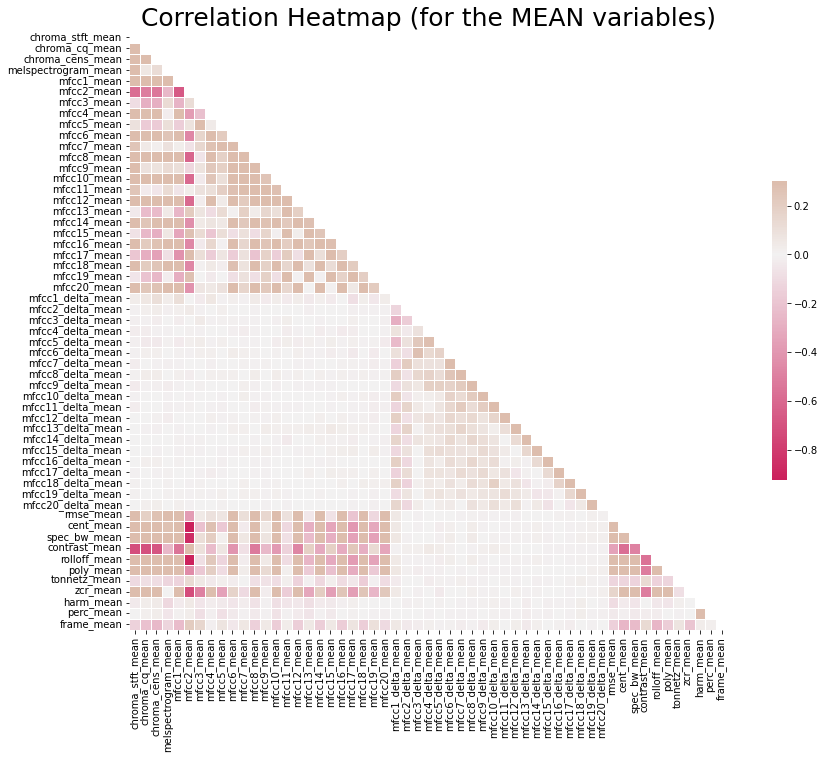

In [19]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

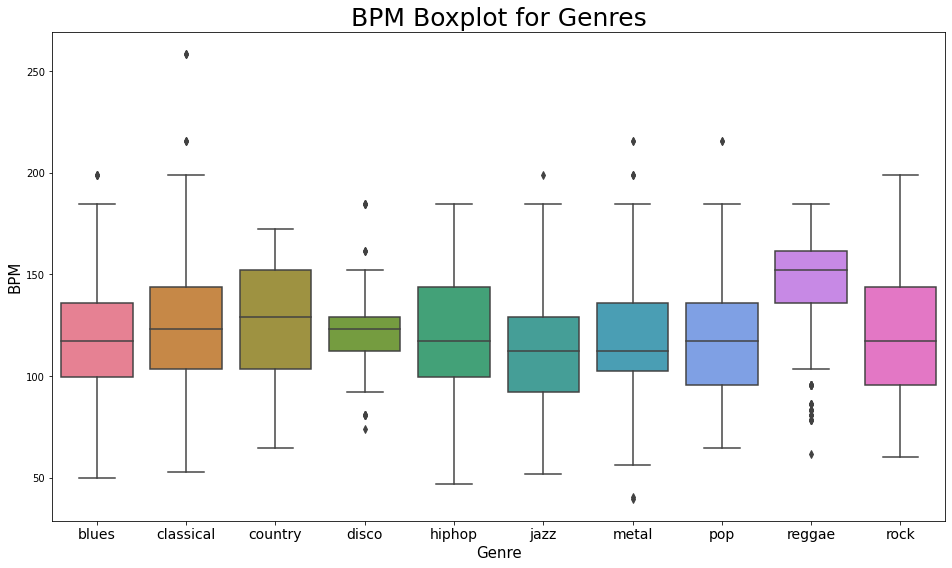

In [20]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [21]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.28185898, 0.20362539])

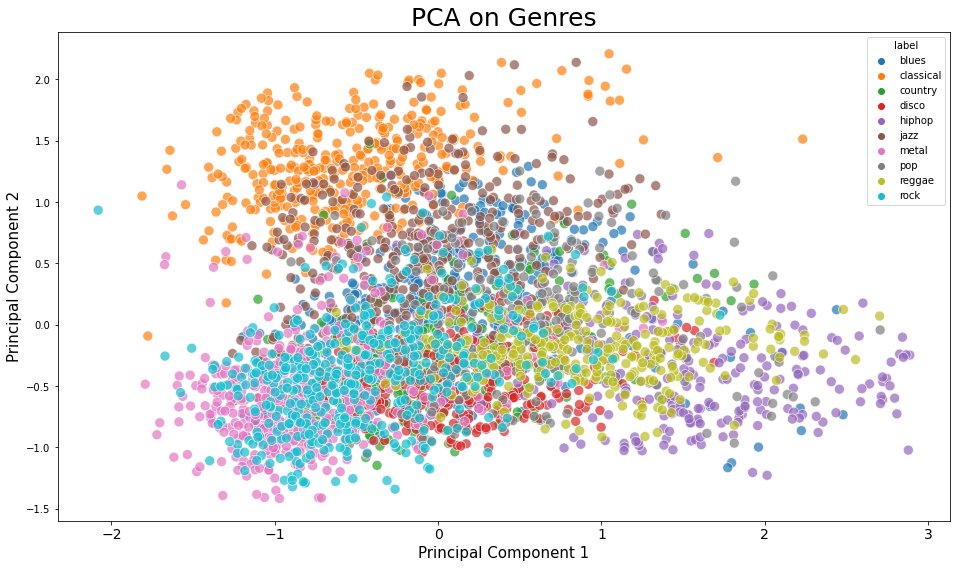

In [22]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")